<a href="https://colab.research.google.com/github/Nayani-j/F1--Data-Telemetry/blob/main/F1_Telemetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fastf1


In [ ]:
import fastf1 as ff1
ff1.Cache.enable_cache('/content/cache')  # This will create a cache directory in Colab


/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
events      WARNING 	Correcting user input 'MON' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api    

Data for 2016 could not be loaded: The data you are trying to access has not been loaded yet. See `Session.load`


events      WARNING 	Correcting user input 'MON' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
DEBUG:fastf1.api:Falling back to livetiming mirror (https://livetiming-mirror.fastf1.dev)
logger      WARNING 	Failed to load session info data!
DEBUG:fastf1.fastf1.core:Traceback for failure in session info data
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fastf1/logger.py", line 151, in __wrapped
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/fastf1/core.py", line 1448, in _load_session_info
    self._session_info = api.session_info(self

Data for 2017 could not be loaded: The data you are trying to access has not been loaded yet. See `Session.load`


events      WARNING 	Correcting user input 'MON' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_d

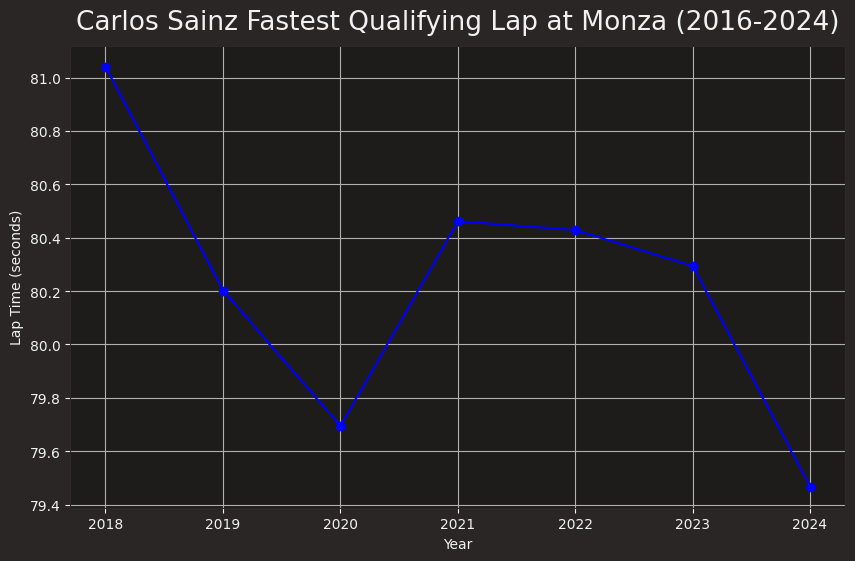

In [ ]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import pandas as pd

# Enable matplotlib to work in Colab
plotting.setup_mpl()

driver_code = 'SAI'  # Carlos Sainz's driver code
circuit = 'MON'      # Monza circuit code

# Create a DataFrame to store the fastest lap data
laps_data = []

for year in range(2016, 2025):  # Loop from 2016 to 2024
    try:
        session = ff1.get_session(year, circuit, 'Q')  # Get qualifying session
        session.load()

        # Get Carlos Sainz's laps
        driver_laps = session.laps.pick_driver(driver_code)

        # Find the fastest lap
        fastest_lap = driver_laps.pick_fastest()

        # Append the data
        laps_data.append({
            'Year': year,
            'Lap Time (s)': fastest_lap['LapTime'].total_seconds()
        })

    except ff1.core.DataNotLoadedError as e:
        print(f"Data for {year} could not be loaded: {e}")
        continue
    except Exception as e:
        print(f"An error occurred for {year}: {e}")
        continue

# Convert to DataFrame for plotting
df = pd.DataFrame(laps_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Lap Time (s)'], marker='o', linestyle='-', color='blue')
plt.title('Carlos Sainz Fastest Qualifying Lap at Monza (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Lap Time (seconds)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req      

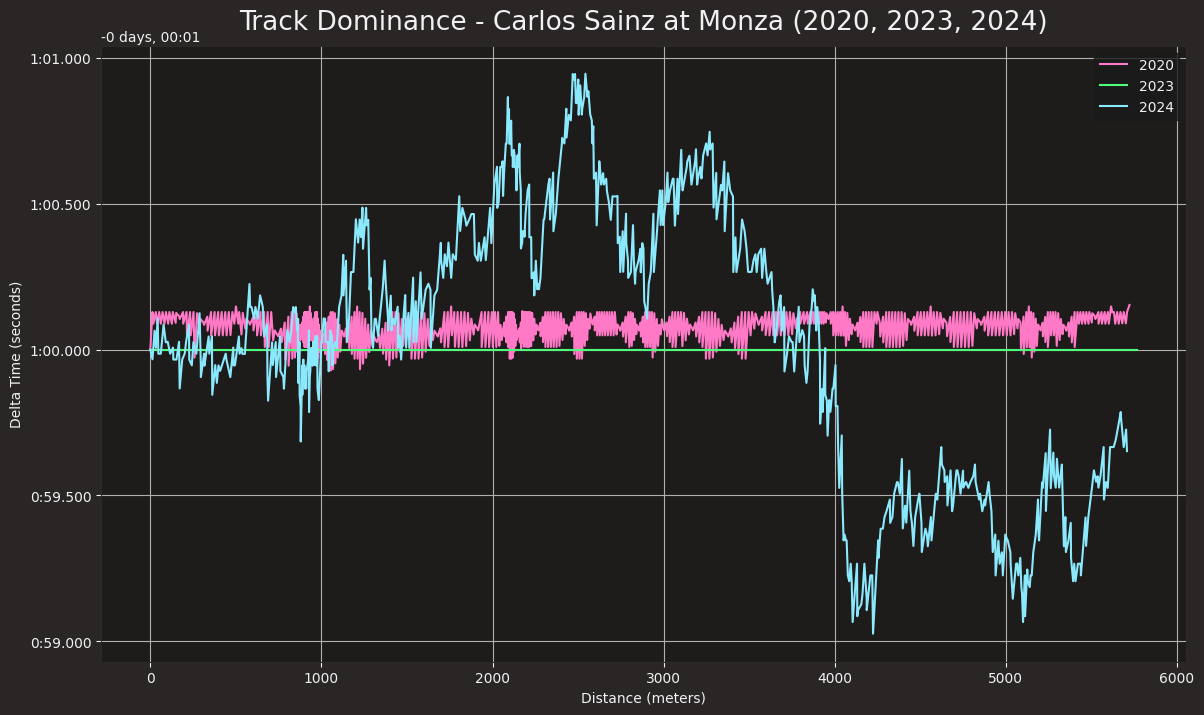

In [ ]:
plotting.setup_mpl()

driver_code = 'SAI'  # Carlos Sainz's driver code
circuit = 'MON'      # Monza circuit code

# Years to compare
years = [2020, 2023, 2024]

plt.figure(figsize=(14, 8))

for year in years:
    try:
        session = ff1.get_session(year, circuit, 'Q')  # Get qualifying session
        session.load()

        # Get Carlos Sainz's fastest lap telemetry
        driver_laps = session.laps.pick_driver(driver_code)
        fastest_lap = driver_laps.pick_fastest()
        telemetry = fastest_lap.get_telemetry()

        # Get the session's overall fastest lap
        session_best_lap = session.laps.pick_fastest()
        session_best_telemetry = session_best_lap.get_telemetry()

        # Calculate time difference at each point on the track
        delta_time = telemetry['Time'] - session_best_telemetry['Time']

        # Add distance to telemetry for plotting
        telemetry = telemetry.add_distance()

        # Plot the delta time as a measure of track dominance
        plt.plot(telemetry['Distance'], delta_time, label=f'{year}')

    except ff1.core.DataNotLoadedError as e:
        print(f"Data for {year} could not be loaded: {e}")
        continue
    except Exception as e:
        print(f"An error occurred for {year}: {e}")
        continue

# Customize plot
plt.title('Track Dominance - Carlos Sainz at Monza (2020, 2023, 2024)')
plt.xlabel('Distance (meters)')
plt.ylabel('Delta Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req      

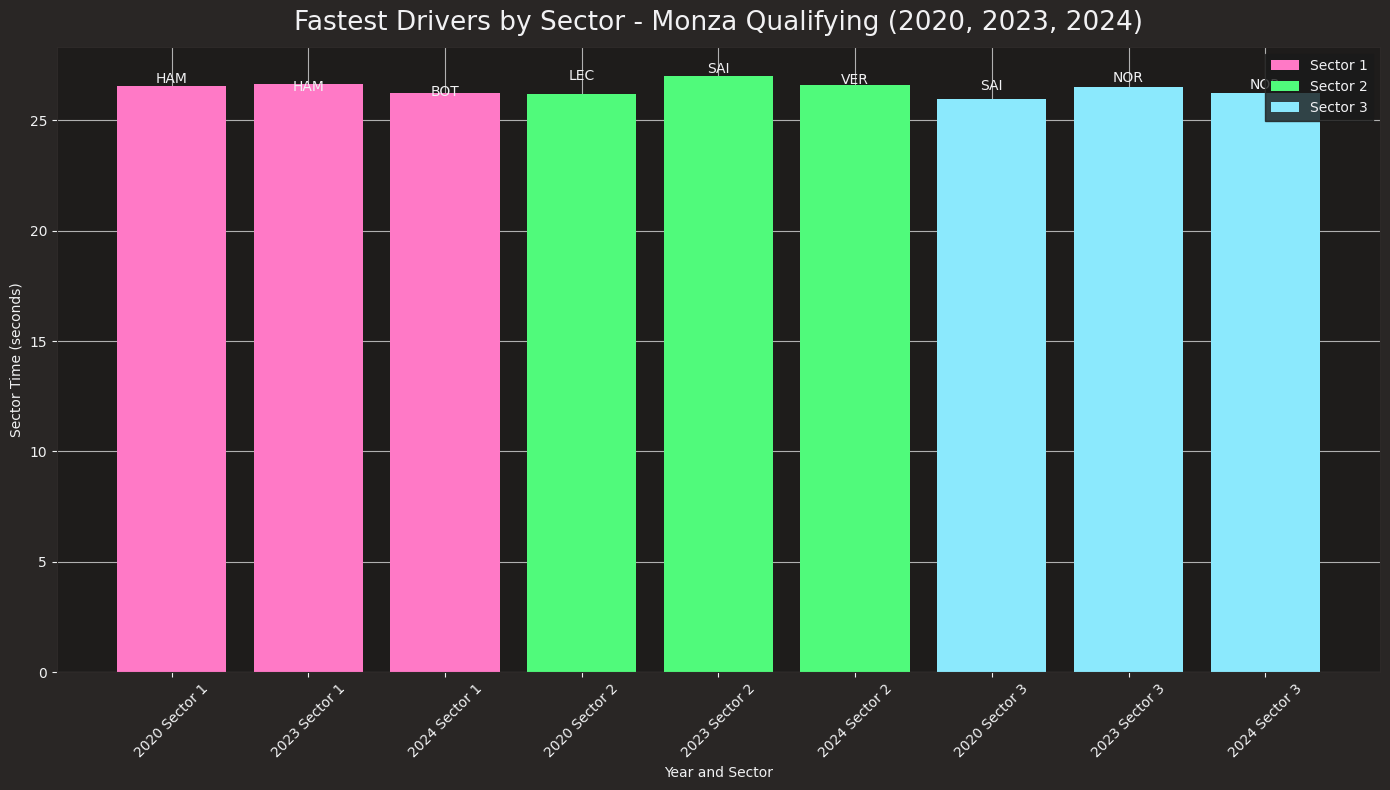

In [ ]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import pandas as pd

# Enable plotting settings from fastf1
plotting.setup_mpl()

circuit = 'MON'      # Monza circuit code

# Years to compare
years = [2020, 2023, 2024]

# DataFrame to store sector times
sector_times = pd.DataFrame(columns=['Year', 'Sector', 'Driver', 'Sector Time'])

for year in years:
    try:
        session = ff1.get_session(year, circuit, 'Q')  # Get qualifying session
        session.load()

        # Temporary DataFrame to store sector times for the current year
        temp_df = pd.DataFrame(columns=['Year', 'Sector', 'Driver', 'Sector Time'])

        # Iterate over sectors
        for sector in [1, 2, 3]:
            # Find the fastest driver in the current sector
            fastest_lap = session.laps.sort_values(by=f'Sector{sector}Time').iloc[0]
            fastest_driver = fastest_lap['Driver']
            fastest_time = fastest_lap[f'Sector{sector}Time'].total_seconds()

            temp_df = pd.concat([temp_df, pd.DataFrame({
                'Year': [year],
                'Sector': [f'Sector {sector}'],
                'Driver': [fastest_driver],
                'Sector Time': [fastest_time]
            })], ignore_index=True)

        # Append to the main DataFrame
        sector_times = pd.concat([sector_times, temp_df], ignore_index=True)

    except ff1.core.DataNotLoadedError as e:
        print(f"Data for {year} could not be loaded: {e}")
        continue
    except Exception as e:
        print(f"An error occurred for {year}: {e}")
        continue

# Plot the results
plt.figure(figsize=(14, 8))

for sector in [1, 2, 3]:
    subset = sector_times[sector_times['Sector'] == f'Sector {sector}']
    # Concatenate year and sector as strings
    x_labels = subset['Year'].astype(str) + ' ' + subset['Sector']
    plt.bar(x_labels, subset['Sector Time'], label=f'Sector {sector}')

# Annotate with the driver names
for i, row in sector_times.iterrows():
    plt.text(i, row['Sector Time'] + 0.01, row['Driver'], ha='center', va='bottom')

# Customize plot
plt.title('Fastest Drivers by Sector - Monza Qualifying (2020, 2023, 2024)')
plt.xlabel('Year and Sector')
plt.ylabel('Sector Time (seconds)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()      # Adjust layout to make room for labels
plt.show()


In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import random
import requests

# Don't forget to 'pip install fastf1'
import fastf1 as ff1

# Don't forget to 'pip install seaborn'
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.4 MB/s eta 0:00:00


In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')

In [11]:
race = fastf1.get_session(2024, 'MON', 'R')
race.load()
laps = race.laps.pick_quicklaps()

events      WARNING 	Correcting user input 'MON' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
DEBUG:fastf1.

In [12]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}

req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info


Index(['McLaren', 'Mercedes', 'Ferrari', 'Red Bull Racing', 'Aston Martin',
       'Williams', 'Haas F1 Team', 'RB', 'Alpine', 'Kick Sauber'],
      dtype='object', name='Team')


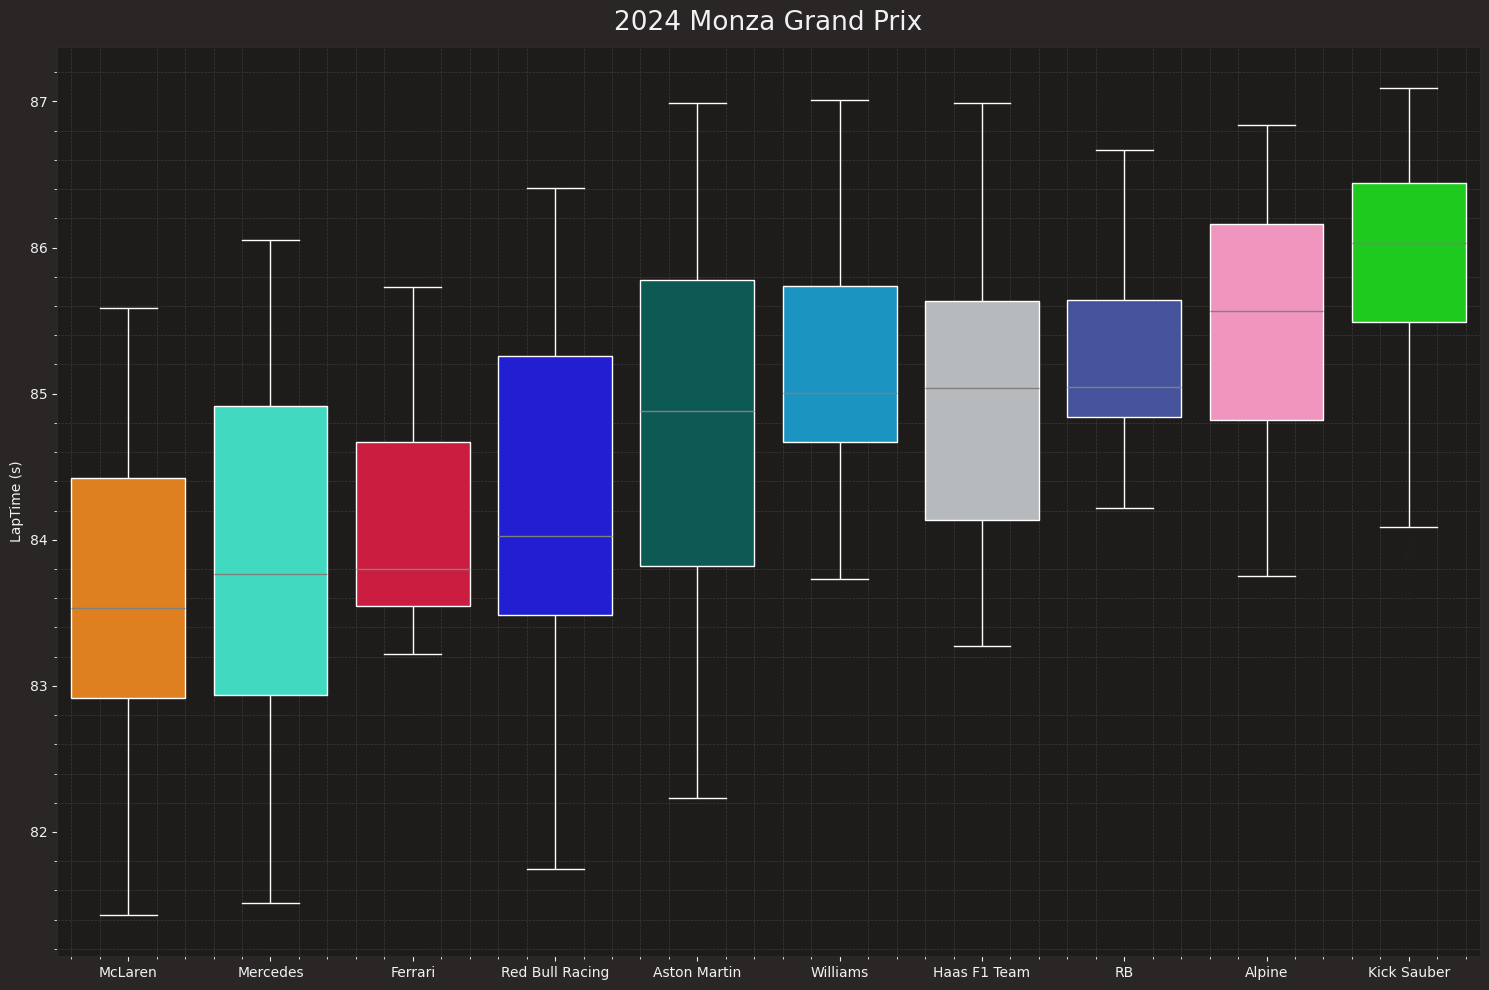

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2024 Monza Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [14]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme=None)


session = fastf1.get_session(2024, 'MONZA', 'Q')
session.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
DEBUG:fastf1.fastf1.core:Traceback for failure in ergast result data
Trace

In [15]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['HAM' 'RUS' 'LEC' 'PIA' 'NOR' 'VER' 'SAI' 'ALB' 'COL' 'HUL' 'ALO' 'RIC'
 'TSU' 'GAS' 'STR' 'MAG' 'OCO' 'PER' 'BOT' 'ZHO']


In [17]:
import fastf1.plotting
from fastf1.core import Laps

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)

In [18]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [19]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     NOR 0 days 00:01:19.327000        0 days 00:00:00
1     PIA 0 days 00:01:19.436000 0 days 00:00:00.109000
2     RUS 0 days 00:01:19.440000 0 days 00:00:00.113000
3     LEC 0 days 00:01:19.461000 0 days 00:00:00.134000
4     SAI 0 days 00:01:19.467000 0 days 00:00:00.140000
5     HAM 0 days 00:01:19.513000 0 days 00:00:00.186000
6     VER 0 days 00:01:19.662000 0 days 00:00:00.335000
7     PER 0 days 00:01:20.062000 0 days 00:00:00.735000
8     ALB 0 days 00:01:20.299000 0 days 00:00:00.972000
9     HUL 0 days 00:01:20.339000 0 days 00:00:01.012000
10    ALO 0 days 00:01:20.421000 0 days 00:00:01.094000
11    RIC 0 days 00:01:20.479000 0 days 00:00:01.152000
12    MAG 0 days 00:01:20.698000 0 days 00:00:01.371000
13    GAS 0 days 00:01:20.738000 0 days 00:00:01.411000
14    OCO 0 days 00:01:20.764000 0 days 00:00:01.437000
15    TSU 0 days 00:01:20.945000 0 days 00:00:01.618000
16    STR 0 days 00:01:21.013000 0 days 00:00:01

In [20]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)

req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info


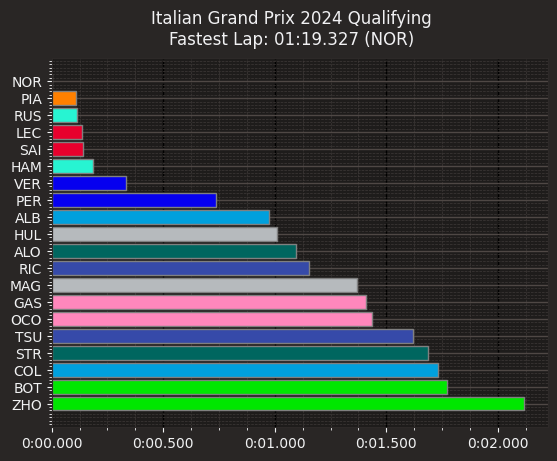

In [22]:
from timple.timedelta import strftimedelta
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

In [23]:
session = fastf1.get_session(2024, "MONZA", 'R')
session.load()
laps = session.laps

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
DEBUG:fastf1.fastf1.core:Traceback for failure in ergast result data
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 537, in _make_request
    response = conn.getresponse()
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 461, in getresponse
    httplib_response = super().getresponse()
  File "/usr/lib/python3.10/http/client.py", line 1375, in getresponse
    response.begin()
  File "/usr/lib/python3.10/http/client.py", line 318, in begin
    version, status, reas

In [24]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['HAM', 'RUS', 'LEC', 'PIA', 'NOR', 'VER', 'SAI', 'ALB', 'COL', 'HUL', 'ALO', 'RIC', 'TSU', 'GAS', 'STR', 'MAG', 'OCO', 'PER', 'BOT', 'ZHO']


In [25]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [26]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)


   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM           17
1     ALB    2.0     HARD           36
2     ALO    1.0   MEDIUM           12
3     ALO    2.0     HARD           23
4     ALO    3.0     HARD           18
5     BOT    1.0     HARD           33
6     BOT    2.0   MEDIUM           19
7     COL    1.0   MEDIUM           16
8     COL    2.0     HARD           37
9     GAS    1.0   MEDIUM           10
10    GAS    2.0     HARD           20
11    GAS    3.0     HARD           22
12    HAM    1.0   MEDIUM           15
13    HAM    2.0     HARD           22
14    HAM    3.0     HARD           16
15    HUL    1.0   MEDIUM            5
16    HUL    2.0     HARD           27
17    HUL    3.0     HARD           20
18    LEC    1.0   MEDIUM           15
19    LEC    2.0     HARD           38
20    MAG    1.0   MEDIUM           14
21    MAG    2.0     HARD           39
22    NOR    1.0   MEDIUM           14
23    NOR    2.0     HARD           18
24    NOR    3.0     HARD

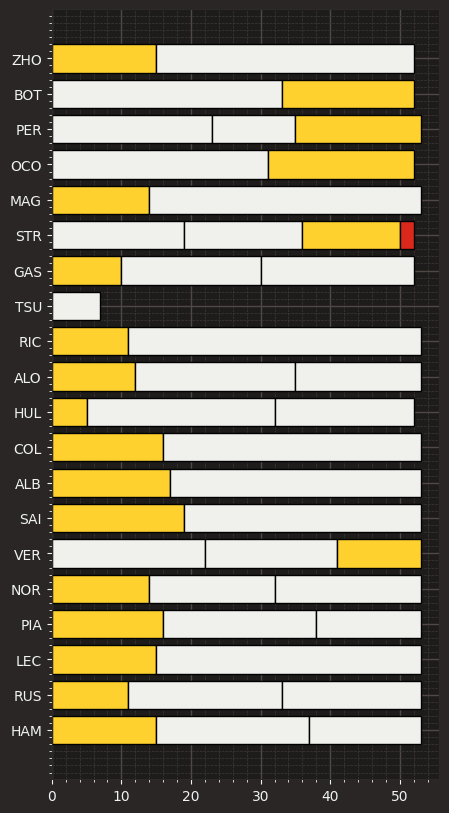

In [27]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

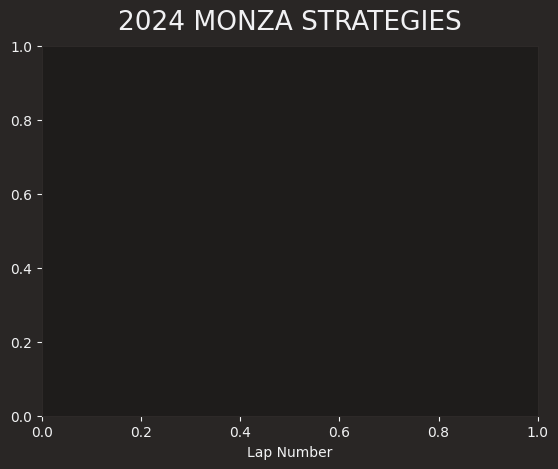

In [28]:
plt.title("2024 MONZA STRATEGIES")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

In [30]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>